# IDS Assignment Part 1 - <font color="red"><h7>Deadline: 18/12/2022 23:59</h7></font>
This is the first part of the assignments in IDS 2022/2023. 
Please use this Jupyter notebook to work on the questions posed in the assignment. When you are done, upload the notebook in Moodle at the designated activity. This is the _only_ file that is required. A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

<font color="red"><b>Student Names and IDs:
    
    1. 
    
    2. 
    
    3.

For those using Jupyter Notebook in your local environments, please install the following library in your environment:
```pip install umap-learn==0.5.3```

In [77]:
#your imports (only use libraries provided in the environment)
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

# Pricing your AirBnB

You finally made it! Working as a data scientist at an established process mining company in New York, you earned so much money that you can buy a flat for yourself. You decide to buy a 2-room apartment in Manhattan. Congratulations!

Currently, you are still living in your rental apartment and are tied to a long-running rental contract. You can only use the apartment in 5 years from now. Therefore, you want to use the apartment as an AirBnB in the meantime, generating some consistent income. 


You have no clue how you should price your AirBnB per night (you are living in New York, so you never needed to book an AirBnB). You decide to leverage your unique skill set and perform a data-driven, informed decision. You collect all the data you can get your hands on by traversing all New York apartments. The retrieved data set **AirBnB_original.csv** is your starting point for investigation.

## Question 1: Exploring the Data Set

As with every data set, you first want to know what you are dealing with. You perform some exploratory data analysis and clean the data along the way.

Show a few data points contained in the data set. Include all attributes.

In [4]:
# Your answer goes here

airBNP_data = pd.read_csv('AirBnB_original.csv')
airBNP_data_10 = airBNP_data[:10]
airBNP_data_10

,id,host id,neighborhood group,neighborhood,lat,long,country,country code,instant bookable,cancellation policy,room type,construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,number rooms
0,1001254,80014485718,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020.0,966,193.0,7.0,9.0,4.0,6.0,1
1,1002102,52335172823,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007.0,142,28.0,7.0,45.0,4.0,2.0,2
2,1002403,78829239556,Manhattan,Harlem,40.80902,-73.94190,United States,US,0,flexible,Private room,2005.0,620,124.0,3.0,0.0,5.0,1.0,1
3,1002755,85098326012,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,0,moderate,Entire home/apt,2005.0,368,74.0,7.0,270.0,4.0,1.0,2
4,1003689,92037596077,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009.0,204,41.0,7.0,9.0,3.0,1.0,1
5,1004650,61300605564,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,moderate,Private room,2015.0,71,14.0,7.0,49.0,5.0,1.0,1
6,1005202,90821839709,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,moderate,Private room,2009.0,1060,212.0,7.0,49.0,5.0,1.0,1
7,1005754,79384379533,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,US,0,strict,Private room,2005.0,1018,204.0,2.0,430.0,3.0,1.0,1
8,1006859,1280143094,Manhattan,Chinatown,40.71344,-73.99037,United States,US,0,flexible,Entire home/apt,2004.0,319,64.0,1.0,160.0,3.0,4.0,1
9,1007411,18824631834,Manhattan,Upper West Side,40.80316,-73.96545,United States,US,0,flexible,Entire home/apt,2008.0,606,121.0,5.0,53.0,4.0,1.0,2


### Basic Cleaning

First, you have to remove NaN entries across the data set such that we only keep rows without any NaN value. How many rows did you remove?

In [47]:
# Your answer goes here
airBNP_data_dropna = airBNP_data.dropna()
print("{} rows have been removed!".format(airBNP_data.shape[0]-airBNP_data_dropna.shape[0]))
airBNP_data_dropna

1477 rows have been removed!


,id,host id,neighborhood group,neighborhood,lat,long,country,country code,instant bookable,cancellation policy,room type,construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,number rooms
0,1001254,80014485718,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0,strict,Private room,2020.0,966,193.0,7.0,9.0,4.0,6.0,1
1,1002102,52335172823,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007.0,142,28.0,7.0,45.0,4.0,2.0,2
2,1002403,78829239556,Manhattan,Harlem,40.80902,-73.94190,United States,US,0,flexible,Private room,2005.0,620,124.0,3.0,0.0,5.0,1.0,1
3,1002755,85098326012,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,0,moderate,Entire home/apt,2005.0,368,74.0,7.0,270.0,4.0,1.0,2
4,1003689,92037596077,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009.0,204,41.0,7.0,9.0,3.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72704,6091333,53266862889,Manhattan,Tribeca,40.71845,-74.01183,United States,US,0,moderate,Entire home/apt,2016.0,787,157.0,1.0,0.0,2.0,1.0,1
72705,6091885,33188605074,Manhattan,East Village,40.72826,-73.98422,United States,US,0,strict,Private room,2017.0,1099,220.0,1.0,8.0,4.0,2.0,1
72706,6092437,12312296767,Brooklyn,Williamsburg,40.70862,-73.94651,United States,US,0,flexible,Private room,2003.0,844,169.0,1.0,0.0,3.0,1.0,1
72707,6093542,69050334417,Brooklyn,Park Slope,40.67505,-73.98045,United States,US,0,moderate,Private room,2009.0,988,198.0,3.0,0.0,5.0,1.0,1


Since duplicated entries are misleading, we want to remove duplicate flats (identified by their id), such that we only keep them once and create a new dataset. How many duplicates are removed?

In [48]:
# Your answer goes here
airBNP_data_drop_dup = airBNP_data_dropna.drop_duplicates(subset=['id'])
print("{} duplicates rows have been removed!".format(airBNP_data_dropna.shape[0]-airBNP_data_drop_dup.shape[0]))

389 duplicates rows have been removed!


From now on, you work with the dataset **AirBnB_cleaned.csv**.

To get a feeling for nightly prices in New York, you take a look at the price attribute. Calculate the average price, the first and third quantiles, and the standard deviation.

In [5]:
# Your answer goes here
cleaned_dataset = pd.read_csv('AirBnB_cleaned.csv')

print(np.mean(cleaned_dataset['price']))
print(np.quantile(cleaned_dataset['price'],0.25))
print(np.quantile(cleaned_dataset['price'],0.75))
print(np.std(cleaned_dataset['price']))

625.4636797380085
340.0
913.0
331.2339031651564


You want to get a more visual picture of the price range. Use a histogram and boxplot to show the distribution of prices on the entire dataset.

{'whiskers': [<matplotlib.lines.Line2D at 0x18913b39d30>,
 'caps': [<matplotlib.lines.Line2D at 0x18913b482b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18913b39bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x18913b487f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18913b48a90>],
 'means': []}

<Figure size 1080x720 with 0 Axes>

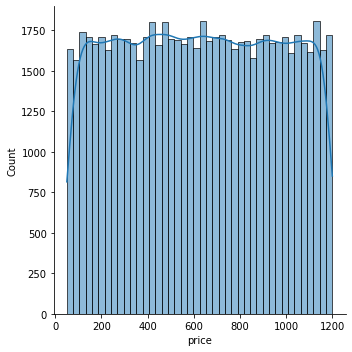

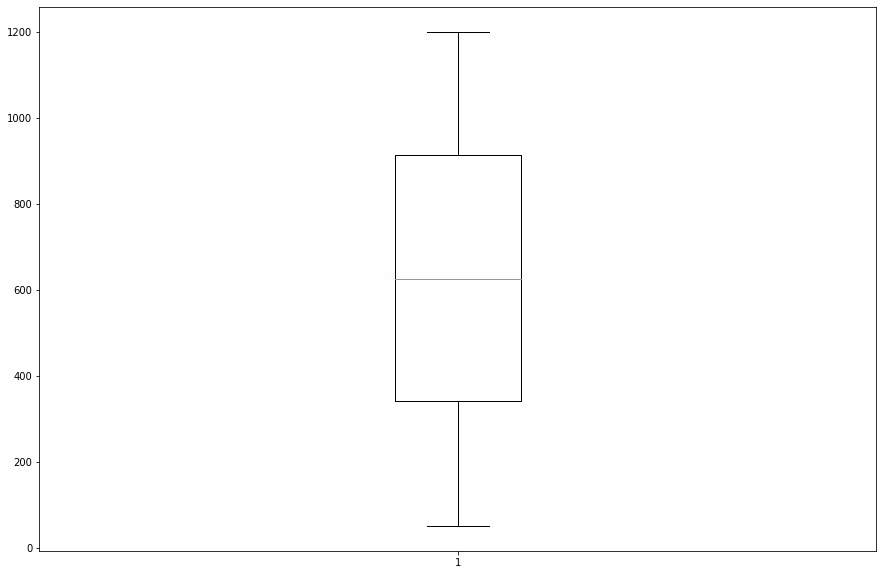

In [66]:
# Your answer goes here
sns.displot(data=cleaned_dataset, x='price', kde=True)
plt.figure(figsize=(15,10))
plt.boxplot(x="price", data=cleaned_dataset)

### Exploring Price Relationships

To inform our pricing decision, we want to investigate some differentiating factors for pricing apartments.

Since you have an overview of the prices and their distribution, you want to investigate which features of your dataset you might use to make your pricing decision. To do so, discuss each feature of the dataset and already rule out features that will definitely not impact the pricing decision. Below you can find a brief description of each feature: 

- id: Unique identifier for an apartment
- host id: Identifier of the host offering a certain apartment
- neighborhood group: Name of a neighborhood group in which an apartment is located
- neighborhood: More fine-grained view on neighborhoods than neighborhood group
- lat: Latitude coordinate of an apartment
- long: Longitude coordinate of an apartment
- country: The country in which an apartment is located
- country code: Code of the country in which an apartment is located
- instant bookable: Boolean values if an apartment is instantly bookable
- cancellation policy: Policy for cancellation of booking
- room type: Type of apartment/room
- construction year: Year of construction of apartment
- price: Price for renting an apartment
- service fee: Fee of service
- minimum nights: Number of minimum nights to rent an apartment
- number of reviews: Number of reviews for an apartment
- review rate number:  Review rate for an apartment (1 to 5)
- calculated host listings count: Number of listings a host has
- number rooms: Number of rooms in an apartment

In [70]:
# - id: This definitely won't affect the price because they are only identifiers for the instances xxxxxxxxxxxxxxx
# - host id: This definitely won't affect the price because they are only identifiers for the hosts xxxxxxxxxxxxxxx
# - neighborhood group: This can be a possible candidate because people tend to prefer some neighborhoods than others.
# - neighborhood: This can be a possible candidate because people tend to prefer some neighborhoods than others.
# - lat: no effect. xxxxxxxxxxxxxxx
# - long: no effect. xxxxxxxxxxxxxxx
# - country: This plays a role depending on the currency, economy of the country, current situation in this country
# - country code: This can be a possible candidate because it is related to the location.
    
# - instant bookable: minimal effect
# - cancellation policy: minimal effect
# - room type: This is another indicator for the space of the flat.
# - construction year: minimal effect and only play role in extremly cases(very old for example).
# - price: ------------
# - service fee: This is added to the whole price and therefore is important
# - minimum nights: More nights can leads to discount
# - number of reviews: no effect. xxxxxxxxxxxxxxx
# - review rate number:  No effect. xxxxxxxxxxxxxxx
# - calculated host listings count: No effect. xxxxxxxxxxxxxxx
# - number rooms: This is another indicator for the space of the flat.

_Answer:_ 


### Univariate Analysis

In the following, you want to analyze which features influence the price. You do this univariately, i.e., look at the relationship between one feature and the price individually. No matter which features you concluded to be useful in the last task, **you will consider the following seven features: service fee, minimum nights, neighborhood group, room type, cancellation policy, construction year, and the number of rooms.**

First, we look closely at the relationship between price and service fee. To do so, create a joint plot for these two attributes. What is your finding? Is this a helpful feature for our pricing decision?

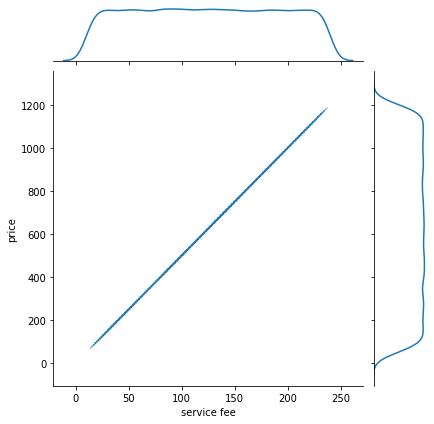

In [85]:

sns.jointplot(data=cleaned_dataset, x="service fee", y="price", kind="kde")
# According to the plot there is a proportional relationship between the two attributes so it is helpful.

_Answer:_



Next, we are interested in the relationship between the number of minimum nights and the price. To analyze it, create a joint plot with a regression. Describe your observation.

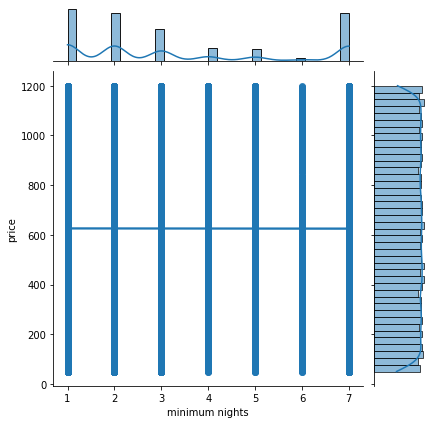

In [74]:
sns.jointplot(x="minimum nights", y="price", data=cleaned_dataset, kind="reg")
# The plot shows no relationship because the regression line isn't able to represent all the data points!

_Answer:_



To further investigate the pricing decision, you look at the remaining five features: neighborhood group, room type, cancellation policy, construction year, and the number of rooms.
To get an overview, you decide to create box plots (including the mean) for each of these features to visualize their influence on the price. Describe your findings. Which values of the features influence the price?

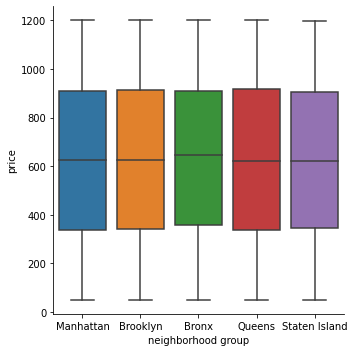

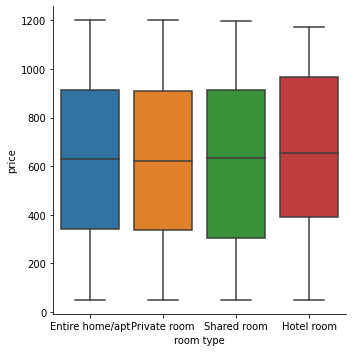

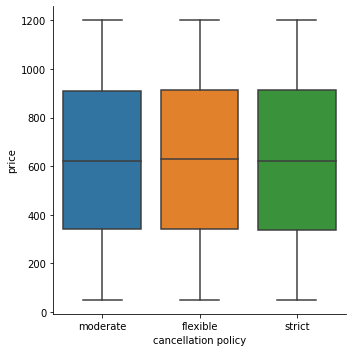

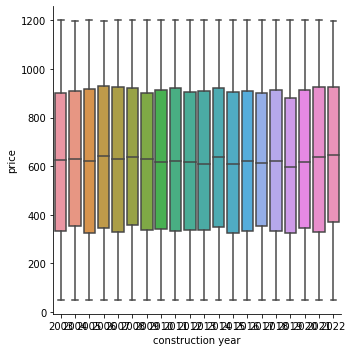

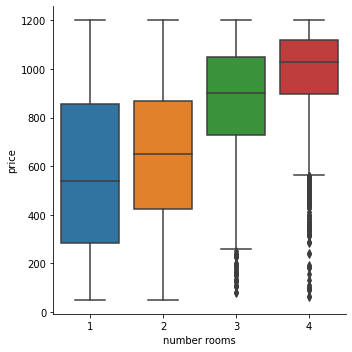

In [140]:
sns.catplot(data=cleaned_dataset, x="neighborhood group", y="price", kind="box")
sns.catplot(data=cleaned_dataset, x="room type", y="price", kind="box")
sns.catplot(data=cleaned_dataset, x="cancellation policy", y="price", kind="box")
sns.catplot(data=cleaned_dataset, x="construction year", y="price", kind="box")
sns.catplot(data=cleaned_dataset, x="number rooms", y="price", kind="box")

_Answer:_



### Multivariate Analysis

As the univariate analysis of price relationships provided only limited insights, you decide to visualize some multivariate investigations of the price. **No matter what you concluded in the last section, you will use the features construction year, number of rooms, cancellation policy, room type, and neighborhood group in the multivariate analysis.**
For each pair of features, create a grouped boxplot (using the hue argument) and investigate whether the two features together allow for an explanation of price differences. In the end, conclude which combination of features should be used to make your pricing decision.

#### Multivariate Analysis for Neighborhood Group

<AxesSubplot: xlabel='neighborhood group', ylabel='price'>

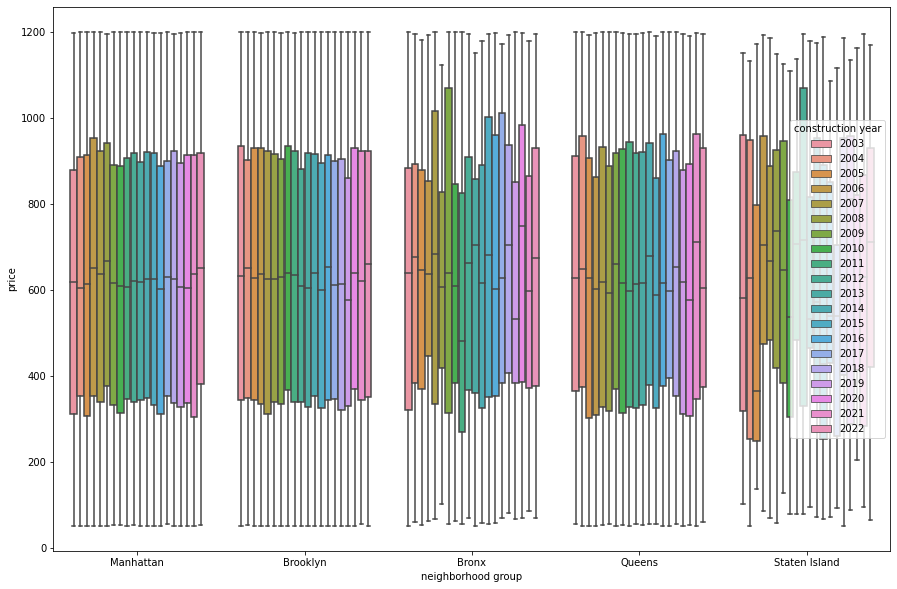

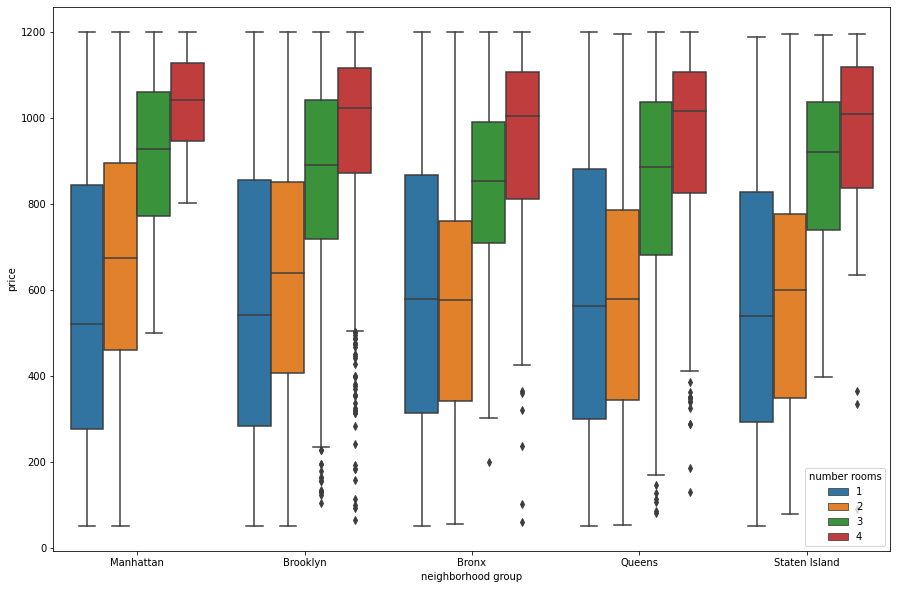

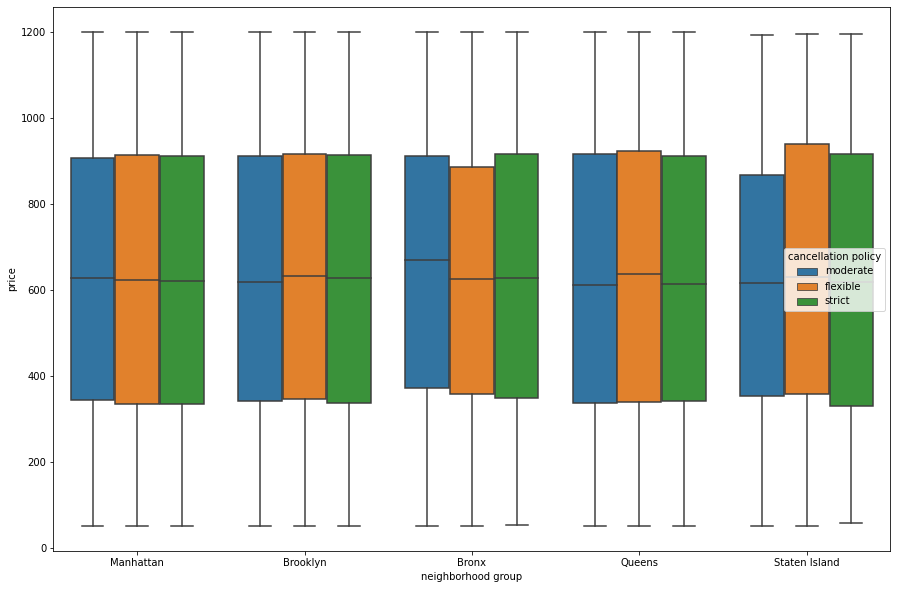

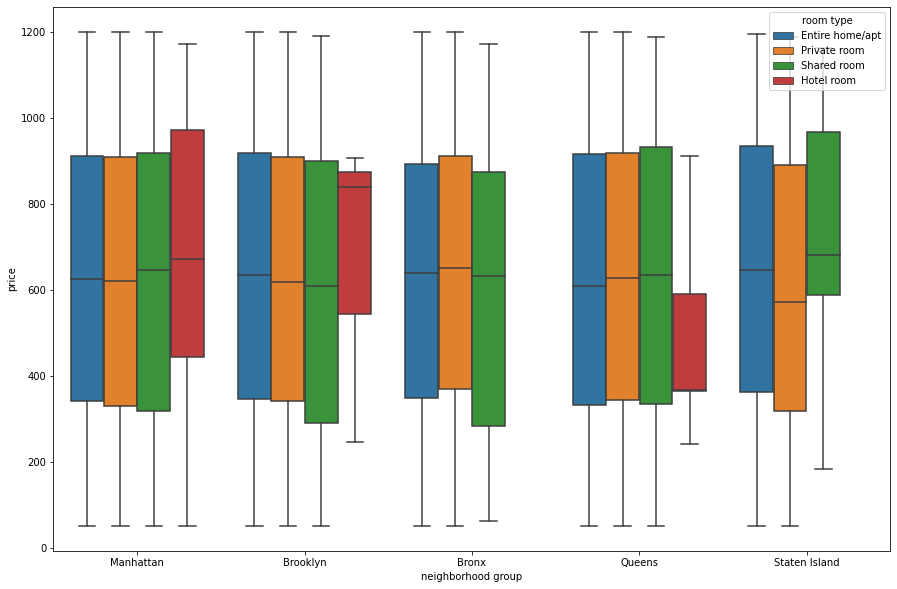

In [134]:
# Your answer goes here
plt.figure(figsize=(15,10))
sns.boxplot(data=cleaned_dataset, x ='neighborhood group', y='price', hue = 'construction year')

plt.figure(figsize=(15,10))
sns.boxplot(data=cleaned_dataset, x ='neighborhood group', y='price', hue = 'number rooms')

plt.figure(figsize=(15,10))
sns.boxplot(data=cleaned_dataset, x ='neighborhood group', y='price', hue = 'cancellation policy')

plt.figure(figsize=(15,10))
sns.boxplot(data=cleaned_dataset, x ='neighborhood group', y='price', hue = 'room type')

_Answer:_



#### Multivariate Analysis for Room Type

<AxesSubplot: xlabel='room type', ylabel='price'>

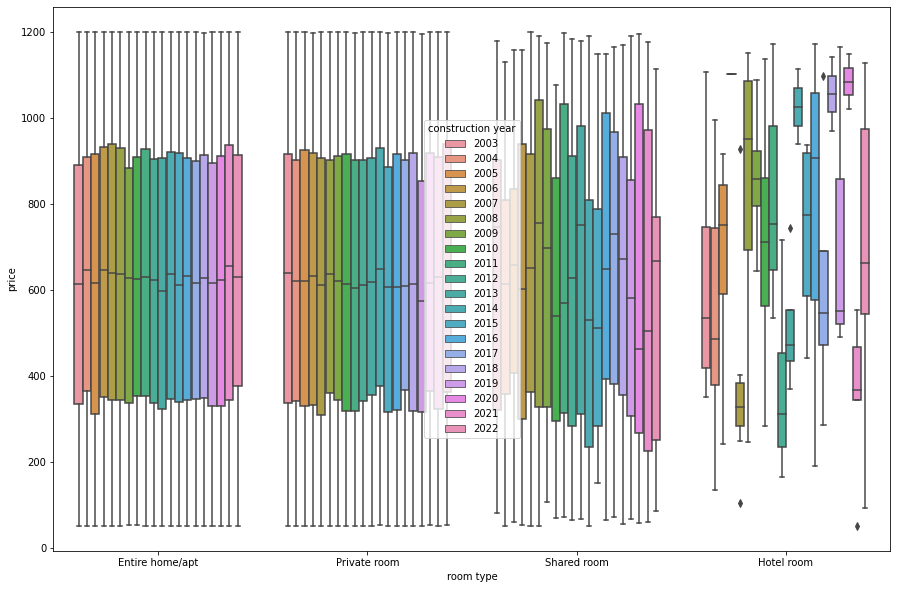

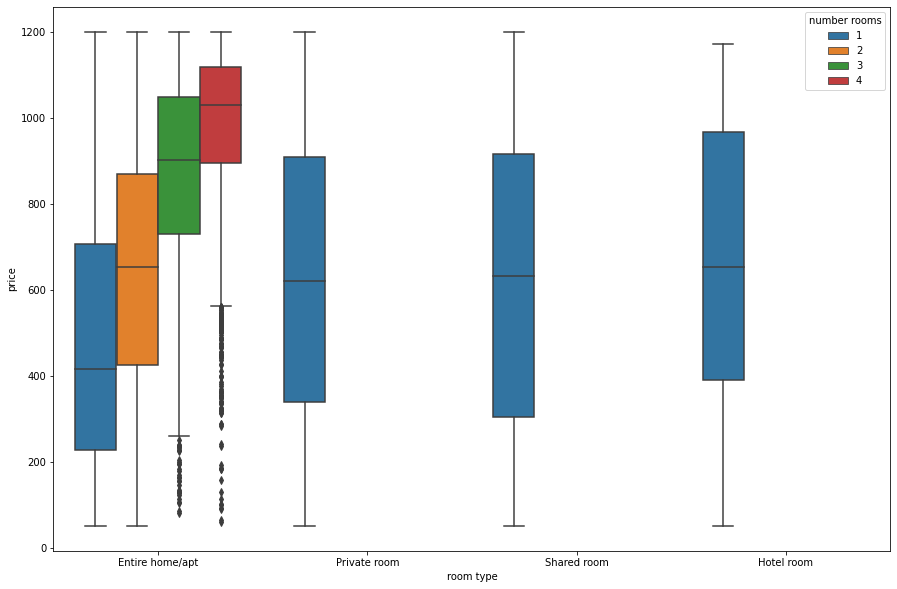

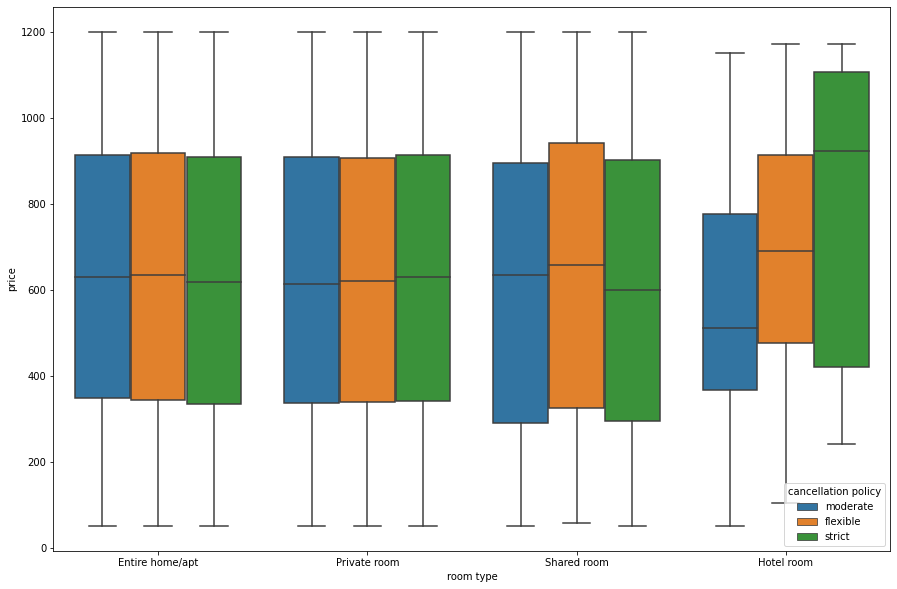

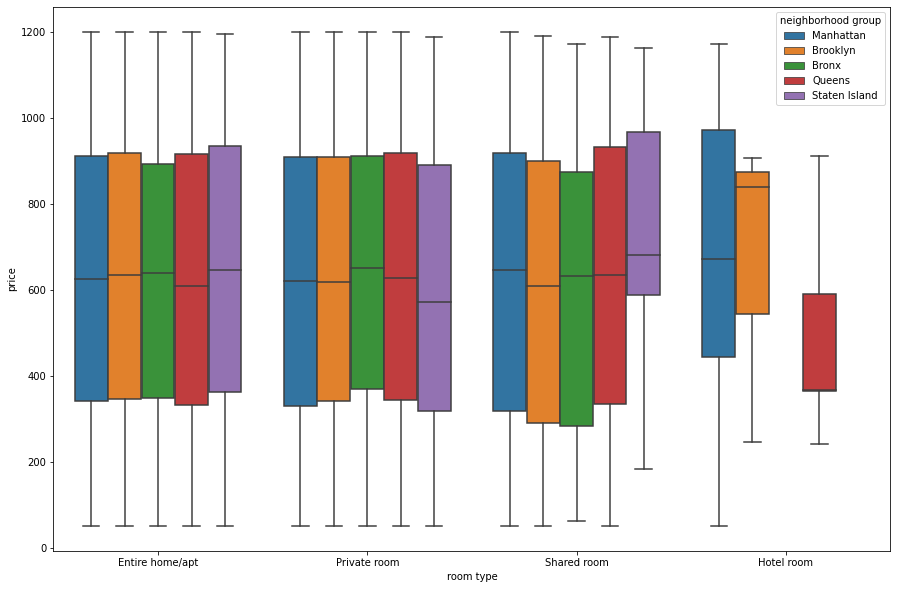

In [135]:
# Your answer goes here
plt.figure(figsize=(15,10))
sns.boxplot(data=cleaned_dataset, x ='room type', y='price', hue = 'construction year')

plt.figure(figsize=(15,10))
sns.boxplot(data=cleaned_dataset, x ='room type', y='price', hue = 'number rooms')

plt.figure(figsize=(15,10))
sns.boxplot(data=cleaned_dataset, x ='room type', y='price', hue = 'cancellation policy')

plt.figure(figsize=(15,10))
sns.boxplot(data=cleaned_dataset, x ='room type', y='price', hue = 'neighborhood group')

_Answer:_


#### Multivariate Analysis for Number of Rooms

<AxesSubplot: xlabel='number rooms', ylabel='price'>

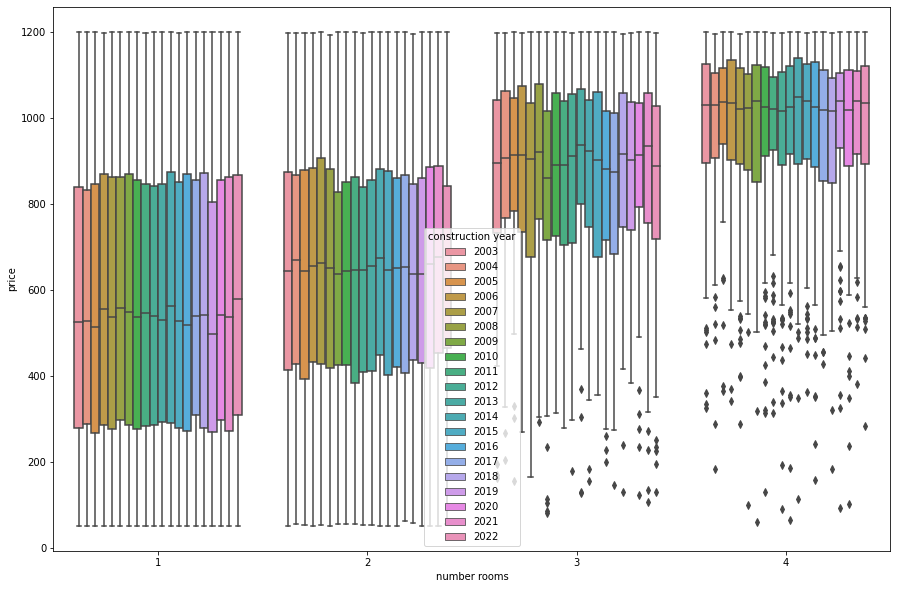

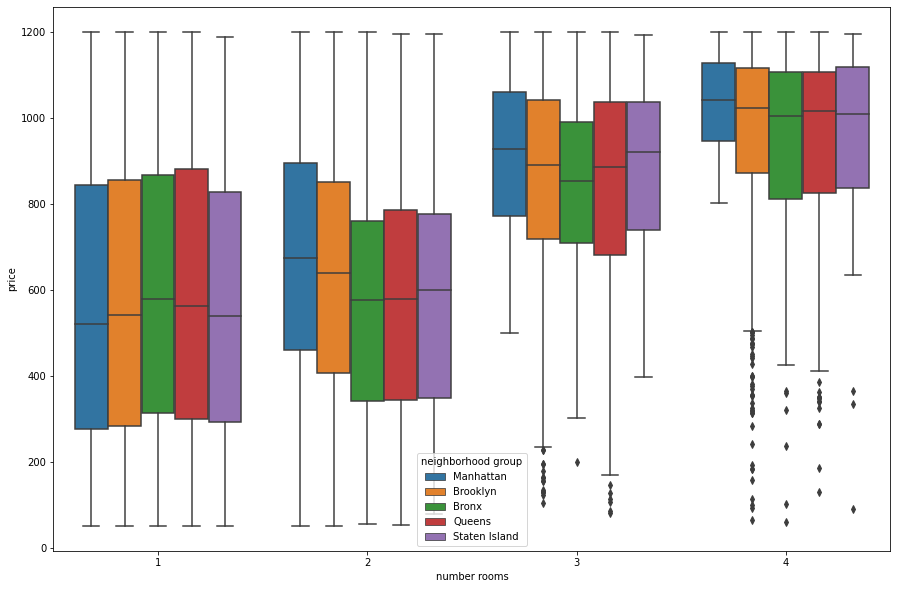

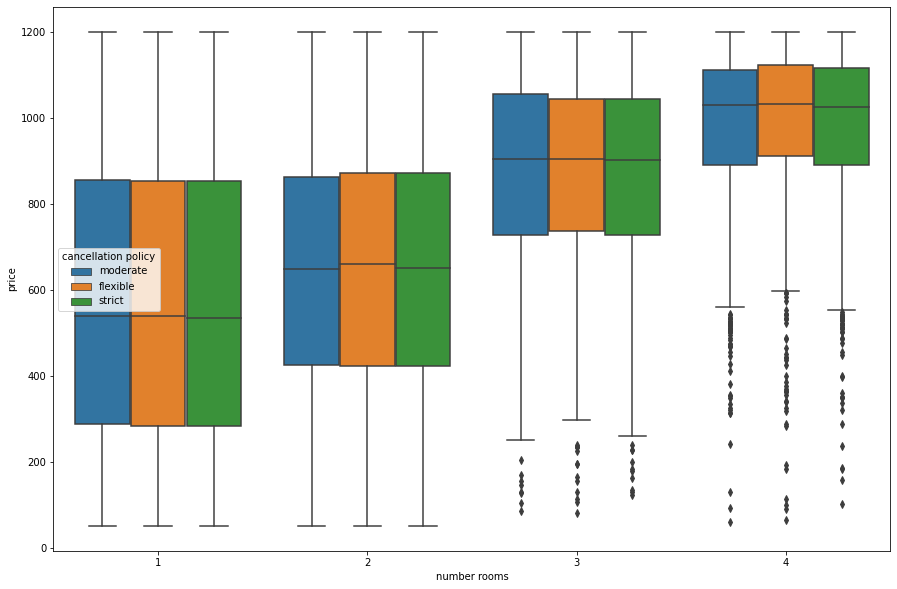

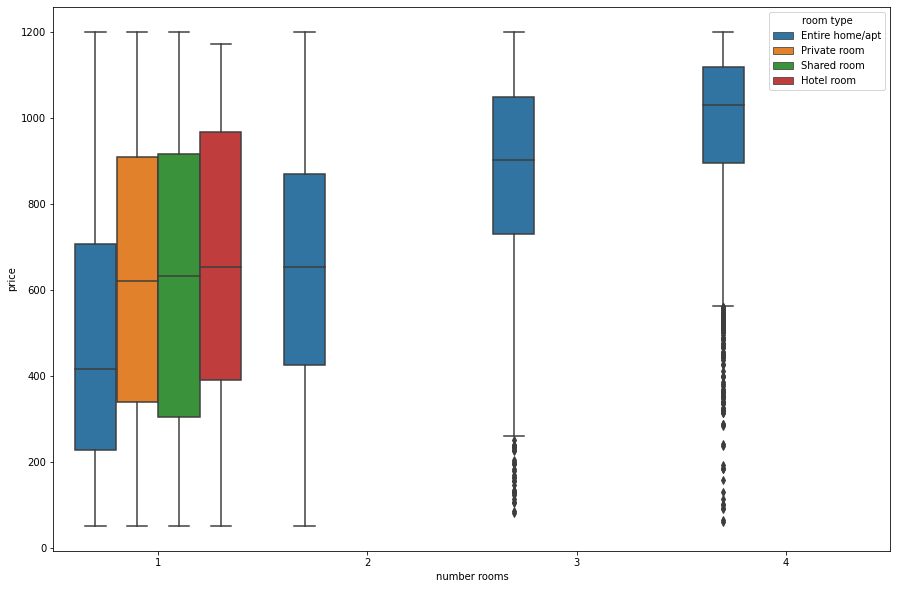

In [136]:
# Your answer goes here
plt.figure(figsize=(15,10))
sns.boxplot(data=cleaned_dataset, x ='number rooms', y='price', hue = 'construction year')

plt.figure(figsize=(15,10))
sns.boxplot(data=cleaned_dataset, x ='number rooms', y='price', hue = 'neighborhood group')

plt.figure(figsize=(15,10))
sns.boxplot(data=cleaned_dataset, x ='number rooms', y='price', hue = 'cancellation policy')

plt.figure(figsize=(15,10))
sns.boxplot(data=cleaned_dataset, x ='number rooms', y='price', hue = 'room type')

_Answer:_



#### Multivariate Analysis for Construction Year

<AxesSubplot: xlabel='construction year', ylabel='price'>

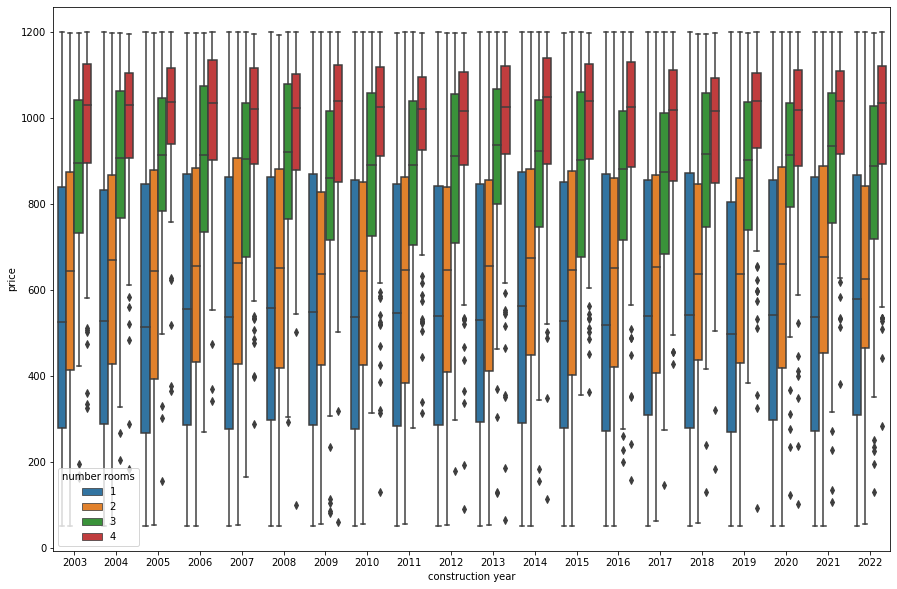

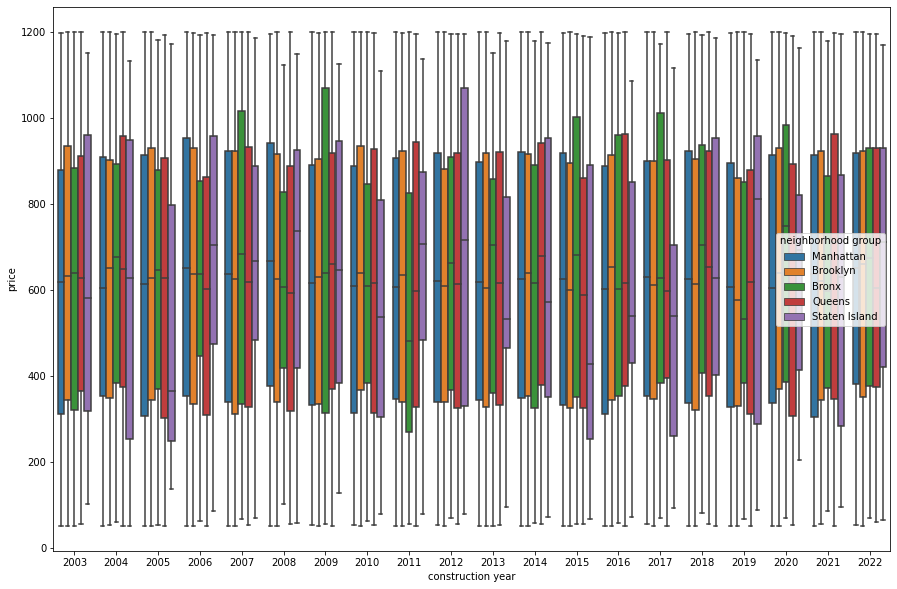

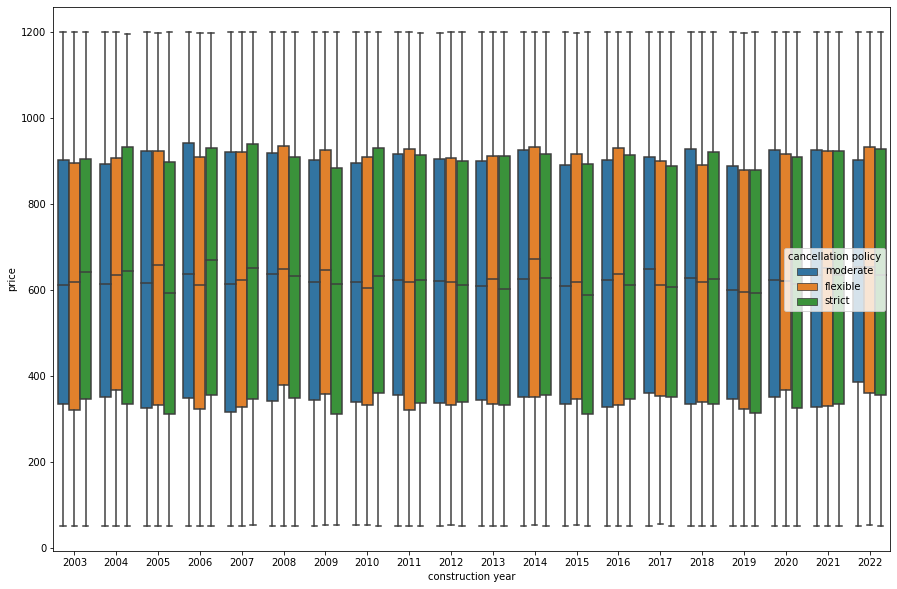

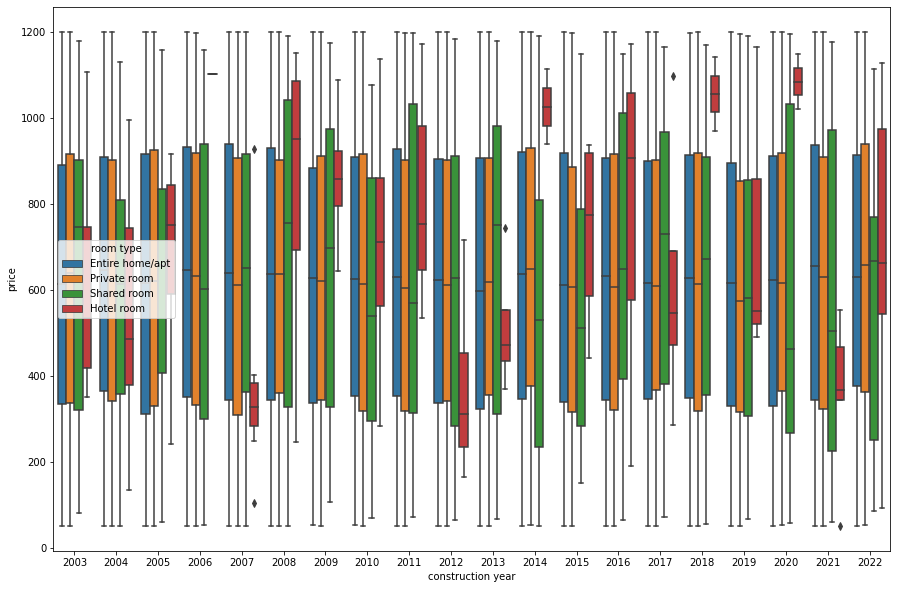

In [138]:
# Your answer goes here
plt.figure(figsize=(15,10))
sns.boxplot(data=cleaned_dataset, x ='construction year', y='price', hue = 'number rooms')

plt.figure(figsize=(15,10))
sns.boxplot(data=cleaned_dataset, x ='construction year', y='price', hue = 'neighborhood group')

plt.figure(figsize=(15,10))
sns.boxplot(data=cleaned_dataset, x ='construction year', y='price', hue = 'cancellation policy')

plt.figure(figsize=(15,10))
sns.boxplot(data=cleaned_dataset, x ='construction year', y='price', hue = 'room type')

_Answer:_



### Selection of Variables

Please argue: Which combinations of variables would you consider for pricing your AirBnB?

_Answer:_
A combination of neighborhood group, construction year and number of rooms

## Question 2: Setting the Price

No matter what you have deducted from your analysis, from now on, you will continue only with three features: **The number of rooms, the neighborhood group, and the room type.**

**Enter Toby**: Toby is your long-term friend back from studying at RWTH. While you studied computer science, Toby studied business administration to become a big shot at Wall Street. He currently works in the back office of some swiss credit institute just across the corner from your office. You decide to drop by and get some of his input for your pricing decision. 

Toby proposes to first use comparables pricing to price your apartment. Comparables pricing is an established concept in economics and means that you price your apartment close to similar apartments. 
You will use different techniques to find similar apartments and set a price.

## Baseline

First, you want to set a baseline to compare against. The baseline should always use the average price of all apartments as a recommended price. Evaluate on a test set of 5%. The same test set should also be used later (you can use the random_state argument in scikit learn's train_test_split, but you need to stay consistent for different questions).

In [6]:
# Your answer goes here
import random

test_set = cleaned_dataset['price'].sample(n=(round(cleaned_dataset.shape[0]/100*5)))
average_price = test_set.mean()
average_price

622.7501411631846

## Decision Tree

Using a decision tree, you try to price your apartment according to similar apartments. 

In the following, we want to know the price ranges for renting AirBnBs. To use decision trees, you need to discretize prices. We use the following price bins:


- [50, 200]
- (200, 400]
- (400, 600]
- (600, 800]
- (800, 1000]
- (1000, 1200]

We add the attribute "Price_Bins" using the discretization mentioned above for each apartment. For example, if an apartment costs 404, it is put into the bin (400, 600].

In [141]:
# Your answer goes here
# sns.displot(cleaned_dataset, x="price", bins=[50, 200, 400, 600, 800, 1000, 1200])
Price_Bins =[]
for index, row in cleaned_dataset.iterrows():
    if(row['price'] >= 50 and row['price'] <= 200):
         Price_Bins.append("[50, 200]")
    elif(row['price'] > 200 and row['price'] <= 400):
         Price_Bins.append("(200, 400]")  
    elif(row['price'] > 400 and row['price'] <= 600):
         Price_Bins.append("(400, 600]")
    elif(row['price'] > 600 and row['price'] <= 800):
         Price_Bins.append("(600, 800]")
    elif(row['price'] > 800 and row['price'] <= 1000):
         Price_Bins.append("(800, 1000]")
    elif(row['price'] > 1000 and row['price'] <= 1200):
         Price_Bins.append("(1000, 1200]")
cleaned_dataset['Price_Bins'] = Price_Bins
cleaned_dataset

,id,host id,neighborhood group,neighborhood,lat,long,country,country code,instant bookable,cancellation policy,room type,construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,number rooms,Price_Bins
0,1002102,52335172823,Manhattan,Midtown,40.75362,-73.98377,United States,US,0,moderate,Entire home/apt,2007,142,28,7,45,4,2,2,"[50, 200]"
1,1002403,78829239556,Manhattan,Harlem,40.80902,-73.94190,United States,US,0,flexible,Private room,2005,620,124,3,0,5,1,1,"(600, 800]"
2,1002755,85098326012,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,0,moderate,Entire home/apt,2005,368,74,7,270,4,1,2,"(200, 400]"
3,1003689,92037596077,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0,moderate,Entire home/apt,2009,204,41,7,9,3,1,1,"(200, 400]"
4,1004650,61300605564,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,0,moderate,Private room,2015,71,14,7,49,5,1,1,"[50, 200]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70837,57353610,69037598918,Queens,Bayside,40.75047,-73.75349,United States,US,0,moderate,Private room,2007,103,21,7,40,1,5,1,"[50, 200]"
70838,57358028,56457739998,Queens,East Elmhurst,40.76245,-73.87938,United States,US,0,strict,Private room,2022,982,196,1,239,2,2,1,"(800, 1000]"
70839,57358580,60176837202,Queens,Edgemere,40.59380,-73.77373,United States,US,0,moderate,Private room,2020,946,189,1,76,1,1,1,"(800, 1000]"
70840,57359685,95625271612,Manhattan,SoHo,40.72318,-74.00223,United States,US,0,flexible,Entire home/apt,2020,1043,209,2,21,4,2,1,"(1000, 1200]"


Consider the extended dataset from the previous task. Use 'number rooms,' 'room type,' and 'neighborhood group' as descriptive features and "Price_Bins" as the target feature. Create a test and training set like before.

In [142]:
# Your answer goes here
reduced_dataset = cleaned_dataset[["number rooms","neighborhood group",'room type', "Price_Bins"]]
test_set1 = reduced_dataset.sample(n=(round(cleaned_dataset.shape[0]*0.05)))



test_set1


,number rooms,neighborhood group,room type,Price_Bins
51053,1,Brooklyn,Private room,"(1000, 1200]"
53237,1,Bronx,Private room,"(600, 800]"
28455,1,Queens,Entire home/apt,"[50, 200]"
20481,4,Queens,Entire home/apt,"(1000, 1200]"
55635,1,Queens,Entire home/apt,"[50, 200]"
...,...,...,...,...
28600,2,Brooklyn,Entire home/apt,"(400, 600]"
13569,1,Brooklyn,Private room,"(600, 800]"
23467,2,Brooklyn,Entire home/apt,"(600, 800]"
66619,4,Manhattan,Entire home/apt,"(1000, 1200]"


Generate a decision tree in which the minimum number of samples for splitting is ten and use entropy. What is the system's entropy?

Note: For this task, you must use the p_decision_tree library.

In [128]:
import pip
pip.main(['install', 'p_decision_tree'])
from p_decision_tree.DecisionTree import DecisionTree
import pandas as pd
from sklearn import tree

from subprocess import check_output

columns = test_set1.columns
#All columns except the last one are descriptive by default
descriptive_features = columns[:-1]
#The last column is considered as label
label = columns[-1]

for column in columns:
    test_set1[column]= test_set1[column].astype(str)
    
    
data_descriptive = test_set1[descriptive_features].values
data_label = test_set1[label].values
decisionTree = DecisionTree(data_descriptive.tolist(), descriptive_features.tolist(), data_label.tolist(), "entropy")
#Here you can pass pruning features (gain_threshold and minimum_samples)
decisionTree.id3(0,10)

#Visualizing decision tree by Graphviz
dot = decisionTree.print_visualTree( render=True )

# print(dot)

print("System entropy: ", format(decisionTree.entropy))

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


System entropy:  2.5786747479809353


What is the first feature the decision tree splits on?

_Answer:_

number rooms

Since it doesn't make sense to set a price range for renting a room, we need to fix a price. For simplicity, we use the means of the bins, i.e., 125, 300, 500, 700, 900, and 1100. For example, if a room were categorized in the bin (200, 400], it would have the price of 300.

What prices are possible given your decision tree for:

- Manhattan, 1-room, Private room
- Staten Island, 1-room, Shared room

_Answer:_
Manhattan: 1100
Staten Island: 700


What is the proposed price of the decision tree for our apartment? Store it in a variable for later usage.

In [ ]:
# Your answer goes here

To evaluate how good our decision tree is for determining price categories, we want to measure the error of the predictions on the test set. To do so, the IDS team provided you helper functions below.

In [86]:
import pydotplus
import networkx as networkx
def get_name_value_dict(graph):
    id_label_dict = {}
    root = decisionTree.root
    visited = set() # Set to keep track of visited nodes of graph.

    def dfs(visited, graph, node):#function for dfs 
        id_label_dict[node.name] = node.value
        if node not in visited:
            if node.next:
                id_label_dict[node.next.name] = node.next.value
            visited.add(node)
            if node.childs:
                for child in node.childs:
                    if child is not None:
                        dfs(visited, graph, child)
            elif node.next:
                if node.next.childs:
                    for child in node.next.childs:
                        if child is not None:
                            dfs(visited, graph, child)
    dfs(visited, decisionTree, root)
    return id_label_dict

def get_predictor(tree):
  id_label_dict = get_name_value_dict(tree)
  dotplus = pydotplus.graph_from_dot_data(tree.source)
  G = networkx.nx_pydot.from_pydot(dotplus)
  root = [n for n,d in G.in_degree() if d==0][0]
  paths = []
  for node in G:
      if G.out_degree(node)==0: #it's a leaf
          paths.append(networkx.shortest_path(G, root, node))
  new_paths = []
  for path in paths:
      for name, value in id_label_dict.items():
          path = ([p.replace(name, value) for p in path])
      new_paths.append(path)
  predictor = {}
  for path in new_paths.copy():
    target = path[-1]
    classification = tuple(path[:-1])
    predictor[classification] = target
  return predictor

def get_prediction_features(predictor):
    features = set()
    for key in predictor:
        i = 0
        while i <= len(key)-2:
            features.add(key[i])
            i +=2
    return features
            
def get_predicted_bin(instance, features, predictor):
  feature_values = {}
  for feature in features:
      feature_values[feature] = instance[feature]
  possible_paths = predictor.keys()
  i=0
  while i<=len(feature_values):
    attribute = [path[i] for path in possible_paths][0]
    if attribute in predictor.values():
      break
    feature_value = feature_values[attribute]
    candidates = []
    for el in possible_paths:
      if str(el[i+1]) == str(feature_value):
        candidates.append(el)
    possible_paths = candidates.copy()
    i+=2
  return predictor[possible_paths[0]]



### Dot is your visual decision tree. Adjust the naming if needed
predictor = get_predictor(dot)
features = get_prediction_features(predictor)

To predict the price bin for each instance of your test set, apply the function get_predicted_bin using the variables *predictor* and *features* provided above.

In [119]:
# Your answer goes here
get_predicted_bin(test_set1, features, predictor)

IndexError: list index out of range

You predicted a price range for AirBnBs in your test set. However, since you cannot enter a price range for renting an apartment, we have to map the range of bins to one value. To do so, we use the mean of bins, as explained before, to predict the price. Given that, compute the mean absolute error between the prediction from the decision tree and the real price provided in the dataset. What is the mean absolute error?

In [ ]:
# Your answer goes here


## Clustering

Another way to do comparables pricing is to find similar apartments using clustering. Each calculated cluster represents one or more similar apartments in the dataset. For each cluster, you calculate the mean price as a representative price. To predict the price for new apartments, you assign them to an existing cluster and give the mean price as prediction.

Use the same features you used in the decision tree for the clustering as well (**number rooms, neighborhood group, room type**), and remember that your dataset is still split into a training and test set.

In this task, you will use the k-means algorithm.
*Note: To keep results comparable, please use 100 for random state and n_init when initializing the clustering algorithm. Also, remember to use the same test and training set as in the previous tasks to compare performances.*

### Encoding 

K-means tries to calculate the distance between different data points. Since some of the features you want to use are not numeric, apply one-hot encoding to be able to use distance measures. Use the preprocessing module of sklearn to prepare your dataset for clustering.

In [148]:
# Your answer goes here
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer

# # preprocess the dataset
# categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
# numerical_preprocessor = StandardScaler()

# # split categorical vs numerical columns
# numerical_columns_selector = selector(dtype_exclude=object)
# categorical_columns_selector = selector(dtype_include=object)

# numerical_columns = numerical_columns_selector(test_set1)
# categorical_columns = categorical_columns_selector(test_set1)

# # create a preprocess that can handle both categorical and numeric data
# preprocessor = ColumnTransformer([
#     ('one-hot-encoder', categorical_preprocessor, categorical_columns),
#     ('standard_scaler', numerical_preprocessor, numerical_columns)])

# preprocessor.fit(test_set1)
# X = preprocessor.transform(test_set1)

# ohe = OneHotEncoder()
# transformed = ohe.fit_transform(test_set1[['neighborhood group']])
# print(transformed.toarray())
# test_set1['neighborhood group']=transformed
# test_set1

average_price =[]
for index, row in test_set1.iterrows():
    if(row['Price_Bins'] == "[50, 200]"):
         average_price.append(125)
    elif(row['Price_Bins'] == "(200, 400]"):
         average_price.append(300)  
    elif(row['Price_Bins'] == "(400, 600]"):
         average_price.append(500)
    elif(row['Price_Bins'] == "(600, 800]"):
         average_price.append(700)
    elif(row['Price_Bins'] == "(800, 1000]"):
         average_price.append(900)
    elif(row['Price_Bins'] == "(1000, 1200]"):
         average_price.append(1100)
test_set2 = test_set1[["number rooms", "neighborhood group", "room type"]]
test_set2['price'] = average_price
test_set2
hot_encoded = pd.get_dummies(test_set2, columns=["neighborhood group","room type"])
hot_encoded

,number rooms,price,neighborhood group_Bronx,neighborhood group_Brooklyn,neighborhood group_Manhattan,neighborhood group_Queens,neighborhood group_Staten Island,room type_Entire home/apt,room type_Hotel room,room type_Private room,room type_Shared room
51053,1,1100,0,1,0,0,0,0,0,1,0
53237,1,700,1,0,0,0,0,0,0,1,0
28455,1,125,0,0,0,1,0,1,0,0,0
20481,4,1100,0,0,0,1,0,1,0,0,0
55635,1,125,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
28600,2,500,0,1,0,0,0,1,0,0,0
13569,1,700,0,1,0,0,0,0,0,1,0
23467,2,700,0,1,0,0,0,1,0,0,0
66619,4,1100,0,0,1,0,0,1,0,0,0


### Choosing number of clusters

In k-means, the number of wanted clusters is a parameter one can decide on. Since this is information you do not have at this time, you choose to use the data to decide.

You cluster on the training dataset by using `k` number of clusters where `k` is between 4 and 15. Since you are interested in the price, for each clustering, you calculate the **standard deviation of the mean prices for the clusters**. Therefore, for each clustering:
1. Calculate the mean price for each of the resulting clusters.
2. Calculate the standard deviation of the mean prices calculated in 1.

Plot a diagram where on the `x-axis` you will have the *number of clusters used* and on the `y-axis` the *standard deviation of the means*.

In your opinion, which amount of clusters makes more sense? Explain your answer.

[[1.15217391e+00 2.25070888e+02 2.07939509e-02 4.25330813e-01
  4.00756144e-01 1.42722117e-01 1.03969754e-02 5.36862004e-01
  9.45179584e-04 4.41398866e-01 2.07939509e-02]
 [1.77400662e+00 9.97682119e+02 3.47682119e-02 3.86589404e-01
  4.24668874e-01 1.42384106e-01 1.15894040e-02 5.46357616e-01
  8.27814570e-04 4.34602649e-01 1.82119205e-02]
 [1.32522796e+00 5.00000000e+02 1.97568389e-02 4.11854103e-01
  4.10334347e-01 1.50455927e-01 7.59878419e-03 5.31914894e-01
  1.51975684e-03 4.46808511e-01 1.97568389e-02]
 [1.51779935e+00 7.00000000e+02 3.72168285e-02 4.04530744e-01
  4.30420712e-01 1.16504854e-01 1.13268608e-02 5.77669903e-01
  1.61812298e-03 3.94822006e-01 2.58899676e-02]]


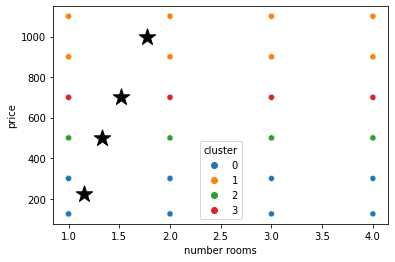

In [154]:
# Your answer goes here

cluster_num = 4
kmeans = KMeans(n_clusters=cluster_num, n_init=10).fit(hot_encoded)
cl_weather = hot_encoded.assign(cluster = kmeans.labels_)

centroids = kmeans.cluster_centers_
print(centroids)

fig, plots = plt.subplots()
sns.scatterplot(data=cl_weather, x="number rooms", y="price", hue=cl_weather.cluster, palette="tab10")
plots.scatter(centroids[:,0], centroids[:,1], marker = '*', s = 300, c = 'k')





#Perform K-means algorithm by varying the number of clusters and visualize the resulting clusters on a 2D plot.
# fig = plt.figure(figsize=(10, 10))
# gs = fig.add_gridspec(2, 2)

# for cluster_num in range(4, 15):
#     kmeans = KMeans(n_clusters=cluster_num, n_init=10).fit(hot_encoded)
#     cl_weather = hot_encoded.assign(cluster = kmeans.labels_)
#     centroids = kmeans.cluster_centers_

#     ax = fig.add_subplot(gs[cluster_num // 2 - 1, cluster_num % 2])
#     sns.scatterplot(data=cl_weather, x="number rooms", y="price", palette="tab10")
#     ax.scatter(centroids[:,0], centroids[:,1], marker = '*', s = 100, c = 'k')

_Answer:_



**Note:** No matter the conclusion made in the previous task, from now on, you use the clustering model with **9 clusters** for predicting the price for your apartment and evaluating the clustering technique.

### Pricing your apartment

To predict the price for your apartment, calculate in which cluster your apartment would be and use the mean value of the cluster as a possible price.

In [ ]:
# Your answer goes here
# cluster for 9 clusters


### Evaluating clustering

You want to evaluate how well your clustering worked. In your case, two things can be evaluated:

1.   Whether the clustering technique can group similar apartments together
2.   Whether other people determine the price of their apartment as you did, meaning whether similar apartments get a similar price

You are going to evaluate the clustering technique visually. The IDS team provides you with the following fancy code that reduces your input to two dimensions.

In [ ]:
import umap.umap_ as umap

#Preprocessing numerical
full_data = x_train # use the train dataset here
numerical = full_data.select_dtypes(exclude='object')

for c in numerical.columns:
    pt = sklearn.preprocessing.PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
##preprocessing categorical
categorical = full_data.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(full_data.select_dtypes(include='object').columns) / full_data.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)

#Augmenting the numerical embedding with categorical
intersection = umap.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.reset_local_connectivity(intersection)
embedding = umap.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components,
                                                fit1._initial_alpha, fit1._a, fit1._b,
                                                fit1.repulsion_strength, fit1.negative_sample_rate,
                                                200, 'random', np.random, fit1.metric,
                                                fit1._metric_kwds, False, {}, False)

# Extracting the resulting dimensions
dimension1 = embedding[0].T[0]
dimension2 = embedding[0].T[1]

Create a scatter plot from the two dimensions and use the cluster labels for coloring the data points. Use the train set for the visualization. Discuss the result.

In [ ]:
# Your answer goes here


_Answer:_



We next evaluate whether similar apartments (considering the attributes we chose) get similar prices. To do this, we use our test set. Assign each apartment of the test set to the nearest centroid. Predict the price of the apartments in the test set by taking the mean price of the cluster they was assigned to. Calculate the mean absolute error between the predicted and real prices.

In [ ]:
# Your answer goes here


### Final comments on the price prediction

Please compare the three approaches used for determining the price. Do they provide a good way of determining the price?

_Answer:_



## Question 3: Investigating Price Elasticity

You show your results to Toby, excited about the price suggestions you got from the decision tree and clustering. You decide to take the higher price, which naturally means more income.

However, he points you to one central flaw in your thinking: The number of bookings is not independent of the price. Therefore, you can not just take any price and assume that this will lead to more income than a lower price, as the demand (utilization) for your apartment might decrease. This is called **price elasticity**.

You want to verify what Toby has been telling you. You extracted the utilization column of your dataset by grabbing the available data from AirBnB's calendar (smart!). The utilization values are contained in dataset **AirBnB_utilization.csv**. **Show several graphs investigating price elasticity.** For example, you might plot the utilization in relation to the price and color according to different variable values. 
After you have verified Toby's statements, you want to learn price elasticity from the dataset (the utilization of an apartment given the price, the number of rooms, the room type, and the neighborhood group, i.e., the same features as before). With the learned price elasticity, you want to evaluate which of the proposed prices (decision tree or clustering) is the better choice.

In [ ]:
# Your answer goes here


You will investigate the relationship between price and utilization in this subtask. First, you will train different models and choose the one that best predicts utilization for an apartment. Second, you will evaluate which of the proposed prices of decision tree and clustering prices were better, assuming that your model provides the correct utilization. Third, you will conclude your investigation and provide a pricing decision.

### Learning price elasticity
You want to use different supervised learning techniques to learn price elasticity. You decide on linear regression, SVM, and multilayer perceptrons. However, you have to preprocess the data. Use the features of the neighborhood group, the room type, the number of rooms, and the price to predict the utilization. Split into training and testing data (test size 5%).

Prepare the data set by splitting, one-hot encoding, and normalizing.

In [ ]:
# Your answer goes here


For each technique, use 5-cross-fold validation and assess the performance on the test set. 

#### Regression

Learn a linear regression to predict the utilization of an AirBnB.

In [ ]:
# Your answer goes here


What is the mean absolute error achieved on the test data?

In [ ]:
# Your answer goes here


Show (draw!) the price elasticity for your apartment. 

In [ ]:
# Your answer goes here


#### Linear SVR

Train and evaluate a Linear SVR (Support Vector Regression) model.

In [ ]:
# Your answer goes here


What is the mean absolute error achieved on the test data?

In [ ]:
# Your answer goes here


Show (draw!) the price elasticity for your apartment. 

In [ ]:
# Your answer goes here


#### Learning Non-Linear Relationships

You realize that learning linear relationships only provides limited performance. You want to learn non-linear relationships. First, you will learn non-linear relationships using linear regression and kernels. Second, you will use non-linear kernels in the Support Vector Regression. Third, you will use neural networks.

#### Kernels in Regression

Use a transformation of the price and a regression to incorporate non-linear relationships, as learned in the lecture. You can try different kernel functions, but at least you should use one quadratic kernel.

In [ ]:
# Your answer goes here


What is the mean absolute error achieved on the test data?

In [ ]:
# Your answer goes here


Show (draw!) the price elasticity for your apartment. 

In [ ]:
# Your answer goes here


#### Kernels in SVR

Train and evaluate an SVR (Support Vector Regression) model with different, non-linear kernels. You can limit the size of your training set to 25000 samples to make the problem feasible in computation time.

In [ ]:
# Your answer goes here


What is the mean absolute error achieved on the test data?

In [ ]:
# Your answer goes here


Show (draw!) the price elasticity for your apartment. 

In [ ]:
# Your answer goes here


What is your conclusion on using kernels?

_Answer:_



#### Neural Network

Learn a neural network (multilayer perceptron) to predict the utilization of an AirBnB.

In [ ]:
# Your answer goes here


What is the mean absolute error achieved on the test data?

In [ ]:
# Your answer goes here


Show (draw!) the price elasticity for your apartment. 

In [ ]:
# Your answer goes here


### Profit discrepencies when incorporating price elasticity

Use the model that best captures price elasticity on the testing set. You can assume that this model accurately captures price elasticity, i.e., is the ground truth. What is the better of the two proposed prices? Is the better price the optimal price?

In [ ]:
# Your answer goes here


_Answer:_



# Question 4: Conclusion

Summarize your findings and discuss limitations.

_Answer:_ 

